## Tristan Shah
### 012761749

In [1]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('100k_a.csv', names = ['User', 'ChannelID', 'ChannelName', 'Start', 'Stop'])
data.head()

,User,ChannelID,ChannelName,Start,Stop
0,1,33842865744,mithrain,154,156
1,1,33846768288,alptv,166,169
2,1,33886469056,mithrain,587,588
3,1,33887624992,wtcn,589,591
4,1,33890145056,jrokezftw,591,594


In [2]:
n_users = data['User'].nunique()
n_channels = data['ChannelName'].nunique()

print('Number of unique user: ', n_users)
print('Number of unique channels: ', n_channels)

Number of unique user:  100000
Number of unique channels:  162625


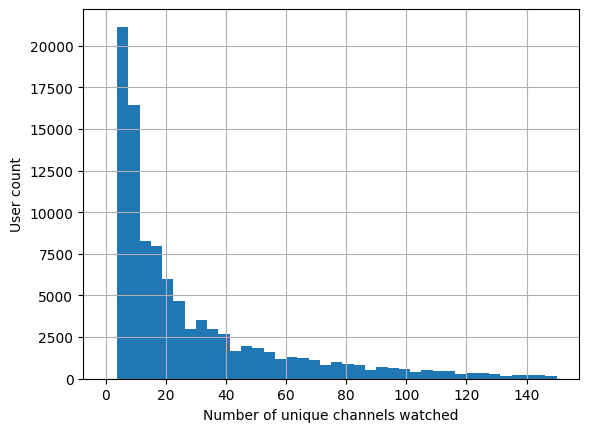

In [3]:
plt.hist(
    data.groupby('User')['ChannelID'].nunique(),
    bins = 40, 
    range = (0., 150.))

plt.xlabel("Number of unique channels watched")
plt.ylabel("User count")
plt.grid()

plt.show()

In [22]:
unique_users = data.groupby('ChannelName')['User'].nunique()
unique_users = unique_users.sort_values()[-40:]

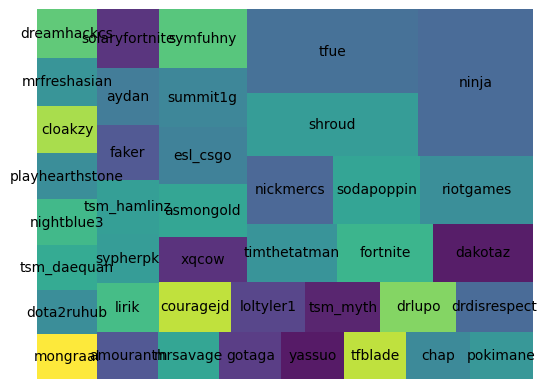

In [29]:
import squarify    # pip install squarify (algorithm for treemap)

# Create a data frame with fake data
# df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })

# plot it
# squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )

squarify.plot(sizes = unique_users.values, label = unique_users.index, alpha = 0.9, text_kwargs={'fontsize':10})
plt.axis('off')
plt.show()

In [10]:
data['Time'] = data['Stop'] - data['Start']

In [11]:
channel_viewers = data.groupby('ChannelName')['User'].nunique()

# channel_viewers.max()

channel_viewers.sort_values()
channel_viewers.mean()

9.255391237509608

In [12]:
channel_viewers.sort()
plt.hist(channel_viewers[-30:])

AttributeError: 'Series' object has no attribute 'sort'

In [80]:
channel_viewers.median()

AttributeError: 'numpy.ndarray' object has no attribute 'median'

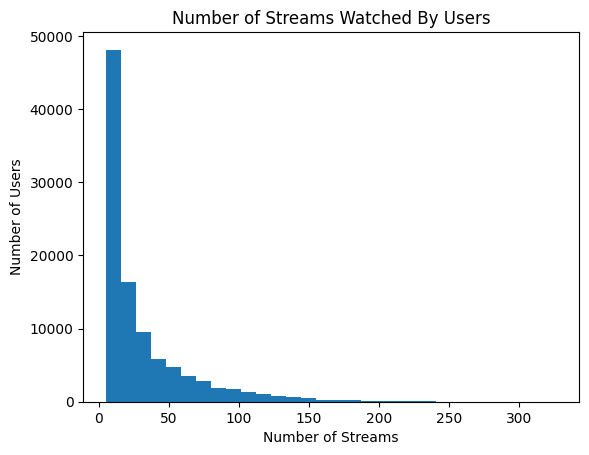

In [15]:
fig, ax = plt.subplots()
ax.hist(data['User'].value_counts(), bins = 30)
ax.set_title('Number of Streams Watched By Users')
ax.set_xlabel('Number of Streams')
ax.set_ylabel('Number of Users')
plt.show()

In [16]:
data['Time'] = data['Stop'] - data['Start']
data.head()

,User,ChannelID,ChannelName,Start,Stop,Time
0,1,33842865744,mithrain,154,156,2
1,1,33846768288,alptv,166,169,3
2,1,33886469056,mithrain,587,588,1
3,1,33887624992,wtcn,589,591,2
4,1,33890145056,jrokezftw,591,594,3


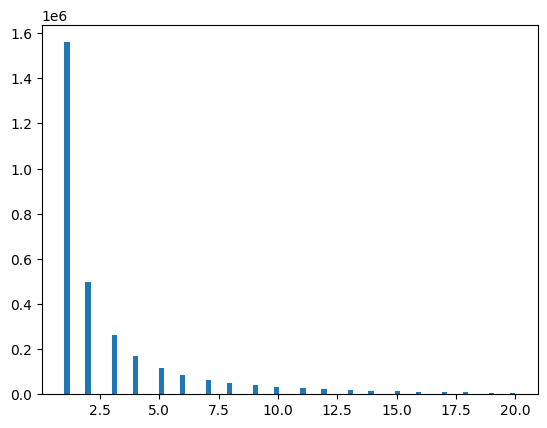

In [17]:
plt.hist(data.Time, bins = data.Time.nunique(), range = (1, 20))
plt.show()

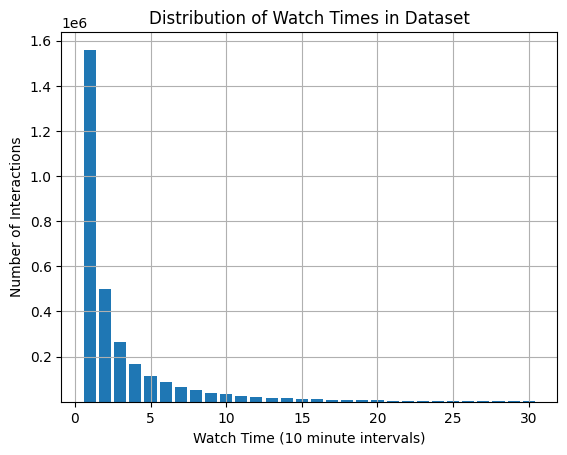

In [18]:
watch_time = data.Time.value_counts().sort_index()[0:30]

plt.bar(watch_time.index, watch_time.values, bottom = 1)
plt.xlabel('Watch Time (10 minute intervals)')
plt.ylabel('Number of Interactions')
plt.title('Distribution of Watch Times in Dataset')
plt.grid()

In [19]:
channel_time = data.groupby(['User', 'ChannelName'])['Time'].sum()

agg = pd.DataFrame({
    'User' : channel_time.index.get_level_values(0),
    'ChannelName' : channel_time.index.get_level_values(1),
    'WatchTime' : channel_time.values
})

agg

,User,ChannelName,WatchTime
0,1,alptv,3
1,1,berkriptepe,3
2,1,elraenn,2
3,1,eraymaskulen,1
4,1,esl_csgo,1
...,...,...,...
1505153,100000,mckytv,1
1505154,100000,natehill,1
1505155,100000,ninja,3
1505156,100000,replays,1


92
4674


Text(0, 0.5, 'Count')

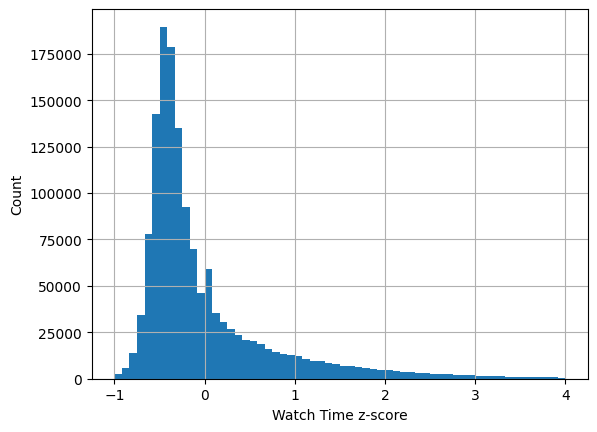

In [69]:
train = agg.sample(frac = 0.95)
test = agg.drop(train.index)

mean_time = train.groupby('User')['WatchTime'].mean()
std_time = train.groupby('User')['WatchTime'].std() + 1.
std_time[std_time.isna()] = 1.0

train = train.join(mean_time, on = 'User', how = 'left', rsuffix = "Mean")
train = train.join(std_time, on = 'User', how = 'left', rsuffix = "Std")
train['z_score'] = (train.WatchTime - train.WatchTimeMean) / train.WatchTimeStd
train.z_score.hist(bins = 60, range = (-1, 4))
train['z_score_exp'] = np.exp(train.z_score)

print((~test.User.isin(train.User)).sum())
print((~test.ChannelName.isin(train.ChannelName)).sum())

test = test.join(mean_time, on = 'User', how = 'left', rsuffix = "Mean")
test = test.join(std_time, on = 'User', how = 'left', rsuffix = "Std")
test['z_score'] = (test.WatchTime - test.WatchTimeMean) / test.WatchTimeStd

# test.z_score.hist(bins = 30, range = (-1, 4))

plt.xlabel('Watch Time z-score')
plt.ylabel('Count')

<AxesSubplot:>

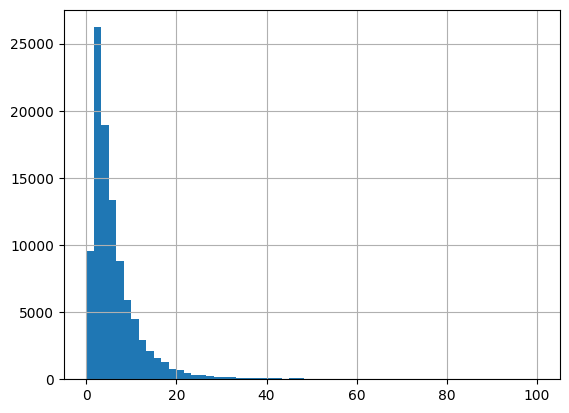

In [79]:
mean_time.hist(bins = 60, range = (0, 100))

In [72]:
train.z_score.m

17657.014410361695

<AxesSubplot:>

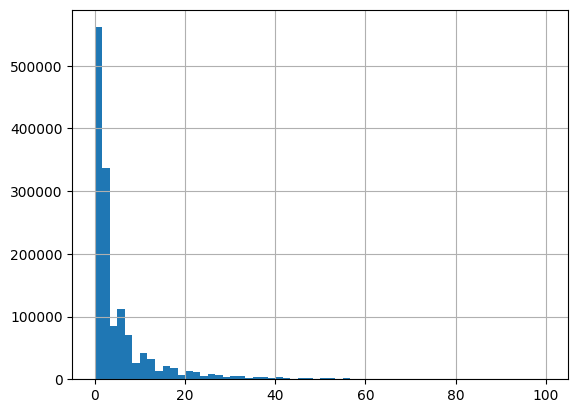

In [66]:
train.WatchTime.hist(bins = 60, range = (0, 100))

In [47]:
test = test[test.User.isin(train.User)]
test = test[test.ChannelName.isin(train.ChannelName)]
print((~test.User.isin(train.User)).sum())
print((~test.ChannelName.isin(train.ChannelName)).sum())

0
0


In [48]:
test

,User,ChannelName,WatchTime,WatchTimeMean,WatchTimeStd,z_score
16,1,wtcn,11,5.941176,8.197835,0.617093
17,1,zeon,5,5.941176,8.197835,-0.114808
26,2,leehunnyeo,1,4.187500,9.627234,-0.331092
55,4,rasney,21,3.388889,4.363102,4.036374
56,4,script,14,3.388889,4.363102,2.432011
...,...,...,...,...,...,...
1505109,99995,ghostex,1,2.000000,2.571810,-0.388831
1505128,99997,dakotaz,1,1.250000,1.500000,-0.166667
1505147,99999,reniferka_,3,2.833333,4.157483,0.040088
1505151,100000,fortnite,2,1.833333,1.752773,0.095087


In [49]:
train

,User,ChannelName,WatchTime,WatchTimeMean,WatchTimeStd,z_score
151738,10429,lvpes,11,5.272727,8.201992,0.698278
156787,10737,osulive,7,8.285714,11.507820,-0.111725
108000,7445,mckytv,2,3.145161,4.899755,-0.233718
1337761,89140,twisetv,1,4.851852,7.375953,-0.522218
644191,42989,ziischu,2,2.105769,3.786647,-0.027932
...,...,...,...,...,...,...
1002489,67131,gordogero,1,4.915254,6.695367,-0.584771
1011034,67700,kumihandu,3,31.321429,47.907358,-0.591171
513719,34387,mrsavage,1,6.000000,11.331352,-0.441254
1430467,95117,streamerhouse,3,5.166667,8.327054,-0.260196


In [39]:
train_z_max = train['z_score'].max()
train_z_min = train['z_score'].min()

train['z_score_scaled'] = (train.z_score - train_z_min) / (train_z_max - train_z_min)
test['z_score_scaled'] = (test.z_score - train_z_min) / (train_z_max - train_z_min) ## scaling test set to be same range
test['z_score_scaled'] = test['z_score_scaled'].clip(0.0, 1.0)

In [42]:
test['z_score_scaled'].max()

1.0

<AxesSubplot:>

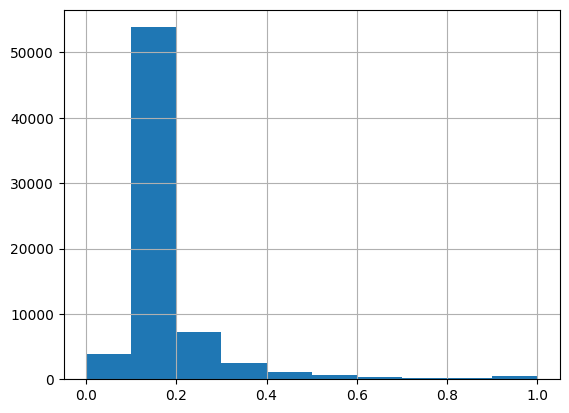

In [43]:
test['z_score_scaled'].hist()

In [44]:
train.to_csv('train.csv')

In [45]:
test.to_csv('test.csv')